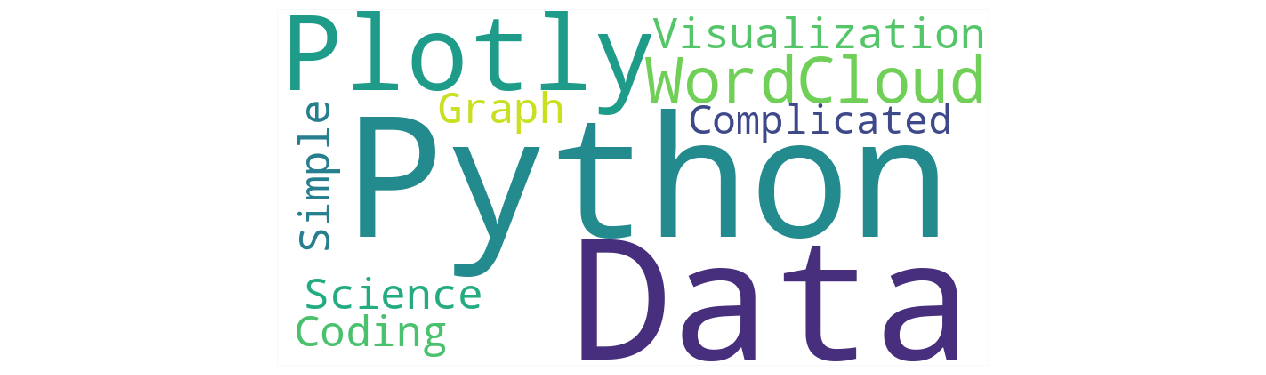

In [1]:
import plotly.express as px
from wordcloud import WordCloud

# 1. Define your text
text = "Python Plotly WordCloud Data Visualization Data Science Coding Python Graph Simple Complicated"

# 2. Generate the WordCloud using the standard library
# We set background_color to white to blend with Plotly
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# 3. Convert to an image array
wordcloud_image = wc.to_array()

# 4. Display in Plotly using imshow (Image Show)
fig = px.imshow(wordcloud_image)

# 5. Clean up the axis to make it look like a pure graphic
fig.update_layout(
    xaxis={'visible': False},
    yaxis={'visible': False},
    margin={'t': 0, 'b': 0, 'l': 0, 'r': 0},
    hovermode=False
)

fig.show()

In [3]:
import plotly.express as px
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display

# 1. Sample Text (A large block of text to make the cloud interesting)
text = """
Python is an interpreted high-level general-purpose programming language.
Plotly is a graphing library that makes interactive, publication-quality graphs online.
WordCloud is a technique to visualize the frequency of words in a text data.
Data Science Machine Learning Artificial Intelligence Coding Scripting
Pandas NumPy Scikit-Learn Matplotlib Seaborn Jupyter Notebook
Interactive Widgets Dash Web Application Automation
""" * 10  # Repeating it to ensure we have enough volume for the slider

# 2. Define the plotting function
# This function will be called every time you move the slider
def update_wordcloud(max_words, bg_color):
    
    # Generate the cloud image using standard library
    wc = WordCloud(
        width=800, 
        height=400, 
        max_words=max_words, 
        background_color=bg_color
    ).generate(text)
    
    # Create the Plotly Figure (Image Show)
    fig = px.imshow(wc)
    
    # Clean up the UI (Remove axes, tight margins)
    fig.update_layout(
        xaxis={'visible': False},
        yaxis={'visible': False},
        margin={'t': 0, 'b': 0, 'l': 0, 'r': 0},
        height=400
    )
    
    fig.show()

# 3. Create the Widgets
max_words_slider = widgets.IntSlider(
    value=20, 
    min=5, 
    max=100, 
    step=1, 
    description='Num Words:'
)

color_dropdown = widgets.Dropdown(
    options=['white', 'black', 'navy', 'mistyrose'],
    value='white',
    description='Background:'
)

# 4. Bind the widgets to the function
out = widgets.interactive(
    update_wordcloud, 
    max_words=max_words_slider,
    bg_color=color_dropdown
)

# 5. Display
display(out)

interactive(children=(IntSlider(value=20, description='Num Words:', min=5), Dropdown(description='Background:'…

In [17]:
import plotly.express as px
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# --- 1. THE DATA ---
# Imagine you have a list of thousands of short texts
from pathlib import Path
corpus_path = Path('.') / 'corpus'

def load_intertitles():
    for srt in corpus_path.glob('intertitle/sf/**/*.srt'):
        year = srt.parent.name
        if not year.isdigit():
            continue
        year = int(year)
        if year < 1900:
            continue
        with open(srt, 'r', encoding='utf8') as f:
            content = f.read()
        intertitles =  [line  for i, line in enumerate(content.split('\n')) if i % 4 == 2]
        yield ' '.join([word for intertitle in intertitles for word in intertitle.split() if len(word) > 3 and not word.isdigit() and not len(set(word)) == 1])

texts = list(load_intertitles())            

stopwords_file = Path('.') / 'stopwords-sv.txt'
if not stopwords_file.exists():
    !wget https://raw.githubusercontent.com/stopwords-iso/stopwords-sv/master/stopwords-sv.txt 

stopwords = Path("stopwords-sv.txt").read_text(encoding="utf-8").splitlines()


# --- 2. THE PRE-PROCESSING (Run this once) ---
# We use CountVectorizer. It does tokenizing + counting + stopword removal 
# all in one highly optimized step.
vec = CountVectorizer(
    stop_words=stopwords,  # Automatically removes "the", "is", "at", etc.
    max_features=200       # Only keep the top 200 words globally to save memory
)

# Fit and transform the texts
matrix = vec.fit_transform(texts)

# Sum the counts for each word across all documents
counts = matrix.sum(axis=0).A1  # .A1 converts matrix to flat array

# Create a dictionary: {'python': 150, 'data': 200, ...}
freq_dict = dict(zip(vec.get_feature_names_out(), counts))

# Sort them just once so the widget doesn't have to sort every time
sorted_freqs = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)


# --- 3. THE WIDGET FUNCTION ---
def update_cloud(num_words, scale):
    # Slice the pre-calculated list (Very fast)
    top_n_dict = dict(sorted_freqs[:num_words])
    
    # Use generate_from_frequencies instead of generate(text)
    wc = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        scale=scale # Controls resolution
    ).generate_from_frequencies(top_n_dict)
    
    # Plotly part
    fig = px.imshow(wc)
    fig.update_layout(
        xaxis={'visible': False}, 
        yaxis={'visible': False},
        margin={'t': 0, 'b': 0, 'l': 0, 'r': 0}
    )
    fig.show()

# --- 4. DISPLAY WIDGETS ---
w_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Words:', continuous_update=False)
scale_slider = widgets.FloatSlider(value=1.0, min=1.0, max=3.0, step=0.5, description='Resolution:')

widgets.interactive(update_cloud, num_words=w_slider, scale=scale_slider)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Words:', max=50, min=1), Float…

In [7]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
